In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_excel('coeficientes_variacion_pobreza_09_23.xlsx')
datos.head(10)

,Estimaciones de la incidencia de la pobreza en hogares y de sus respectivos coeficientes de variación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,e intervalos de confianza al 90%. Total 31 agl...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Área geográfica,Indicadores,CV,Intervalo de confianza,NaN
3,NaN,NaN,NaN,LI,LS
4,NaN,NaN,NaN,NaN,NaN
5,Total 31 aglomerados urbanos,29.6,2.4,28.4,30.7
6,Aglomerados del Interior,28.7,1.9,27.8,29.6
7,Regiones,NaN,NaN,NaN,NaN
8,Gran Buenos Aires,30.3,4.1,28.2,32.4
9,Ciudad Autónoma de Buenos Aires,11.7,12.6,9.2,14.1


In [3]:

datos_limpios = datos.dropna()

In [4]:
datos_limpios = datos_limpios.reset_index(drop=True)
datos_limpios.sample()

,Estimaciones de la incidencia de la pobreza en hogares y de sus respectivos coeficientes de variación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Total 31 aglomerados urbanos,29.6,2.4,28.4,30.7


In [5]:
dict_datos = {
    'Estimaciones de la incidencia de la pobreza en hogares y de sus respectivos coeficientes de variación':'ip',
    'Unnamed: 1':'d1',
    'Unnamed: 2':'d2',	
    'Unnamed: 3':'d3',
    'Unnamed: 4':'d4'
}

datos_limpios = datos_limpios.rename(columns=(dict_datos))


In [6]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      42 non-null     object
 1   d1      42 non-null     object
 2   d2      42 non-null     object
 3   d3      42 non-null     object
 4   d4      42 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB


In [7]:
datos_limpios.head()

,ip,d1,d2,d3,d4
0,Total 31 aglomerados urbanos,29.6,2.4,28.4,30.7
1,Aglomerados del Interior,28.7,1.9,27.8,29.6
2,Gran Buenos Aires,30.3,4.1,28.2,32.4
3,Ciudad Autónoma de Buenos Aires,11.7,12.6,9.2,14.1
4,Partidos del GBA,36.1,4.2,33.6,38.6


In [8]:
datos_limpios['d1'].std()

6.5340940027444905

In [9]:
datos_limpios['d2'].std()

3.3198003452273896

In [10]:
datos_limpios['d3'].std()

6.410426774292912

In [11]:
datos_limpios['d4'].std()

6.9971244301041295

In [12]:
datos_limpios['ip'].unique()

array(['Total 31 aglomerados urbanos ', 'Aglomerados del Interior',
       'Gran Buenos Aires', 'Ciudad Autónoma de Buenos Aires',
       'Partidos del GBA', 'Cuyo', 'Gran Mendoza', 'Gran San Juan',
       'Gran San Luis', 'Noreste', 'Corrientes', 'Formosa',
       'Gran Resistencia', 'Posadas', 'Noroeste', 'Gran Catamarca',
       'Gran Tucumán - Tafí Viejo', 'Jujuy - Palpalá', 'La Rioja',
       'Salta', 'Santiago del Estero - La Banda', 'Pampeana',
       'Bahía Blanca - Cerri', 'Concordia', 'Gran Córdoba',
       'Gran La Plata', 'Gran Rosario', 'Gran Paraná', 'Gran Santa Fe',
       'Mar del Plata ', 'Río Cuarto', 'Santa Rosa - Toay',
       'San Nicolás - Villa Constitución', 'Patagonia',
       'Comodoro Rivadavia - Rada Tilly', 'Neuquén - Plottier',
       'Río Gallegos', 'Ushuaia - Río Grande', 'Rawson - Trelew',
       'Viedma - Carmen de Patagones',
       'Total Aglomerados de 500.000 y más habitantes',
       'Total Aglomerados de menos de 500.000 habitantes'], dtype=objec

In [13]:
datos_limpios['ip'][0]

'Total 31 aglomerados urbanos '

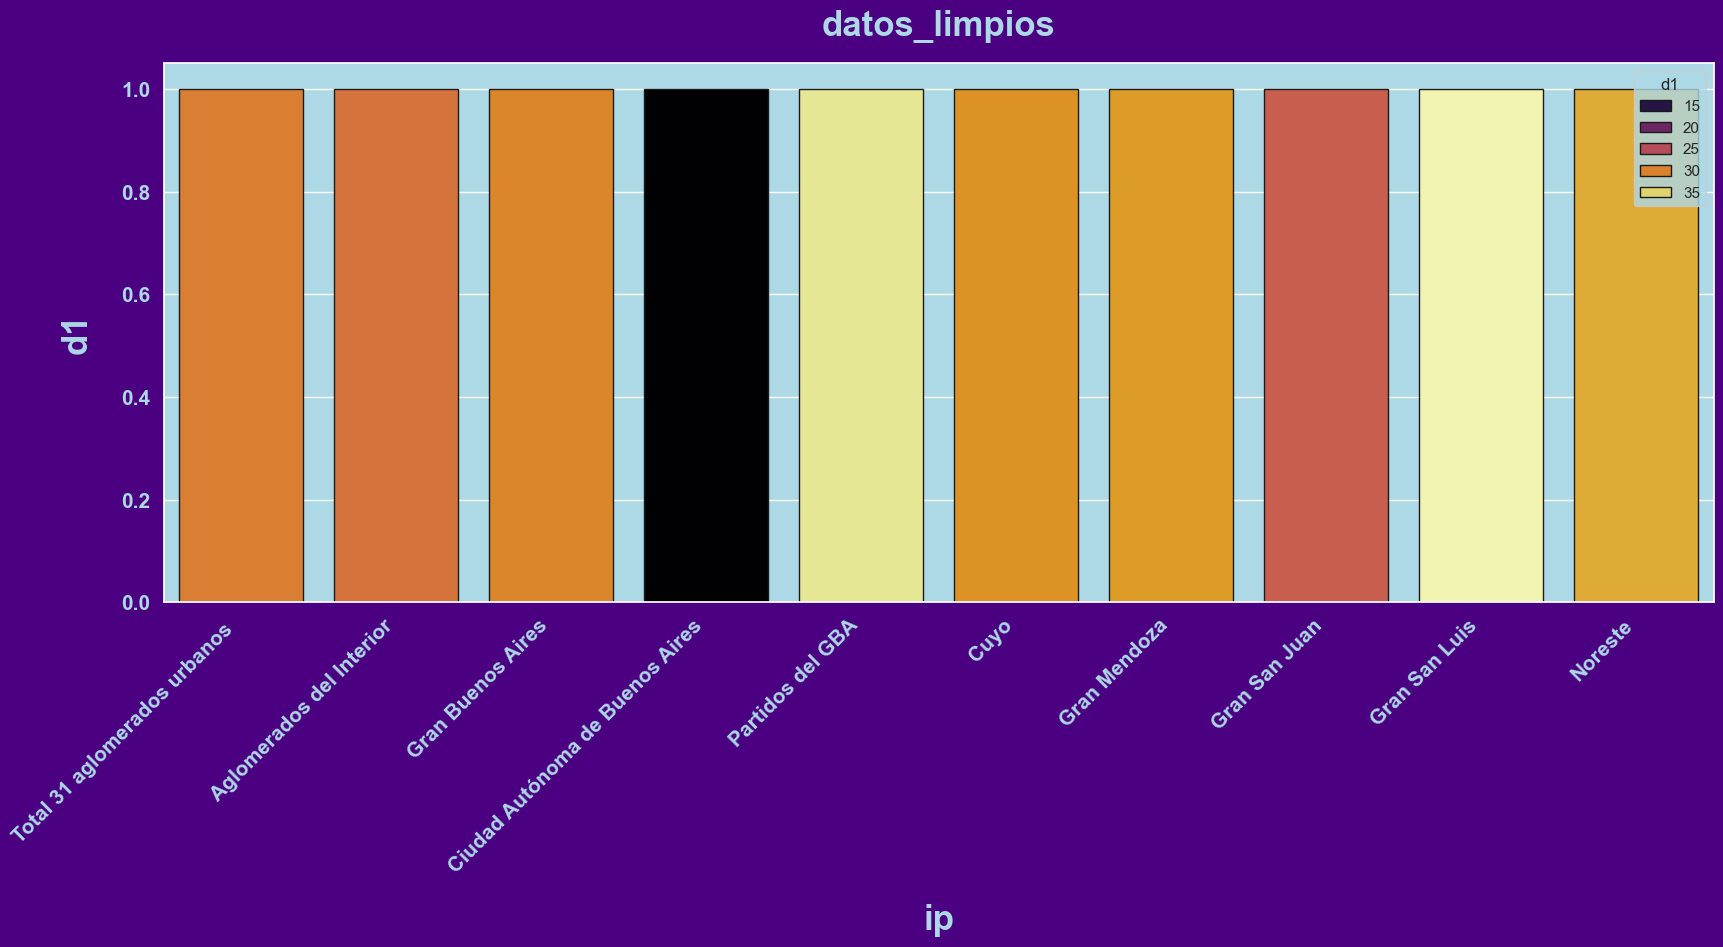

In [14]:
from matplotlib.ticker import FixedLocator
def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.countplot(data=datos_limpios.head(10), x='ip',hue='d1', palette='inferno', edgecolor='k');
    ax.figure.set_size_inches(20,7)
    ax.set_title('datos_limpios', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('ip', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('d1',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45, ha='right')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas)
    plt.show()
grafico()

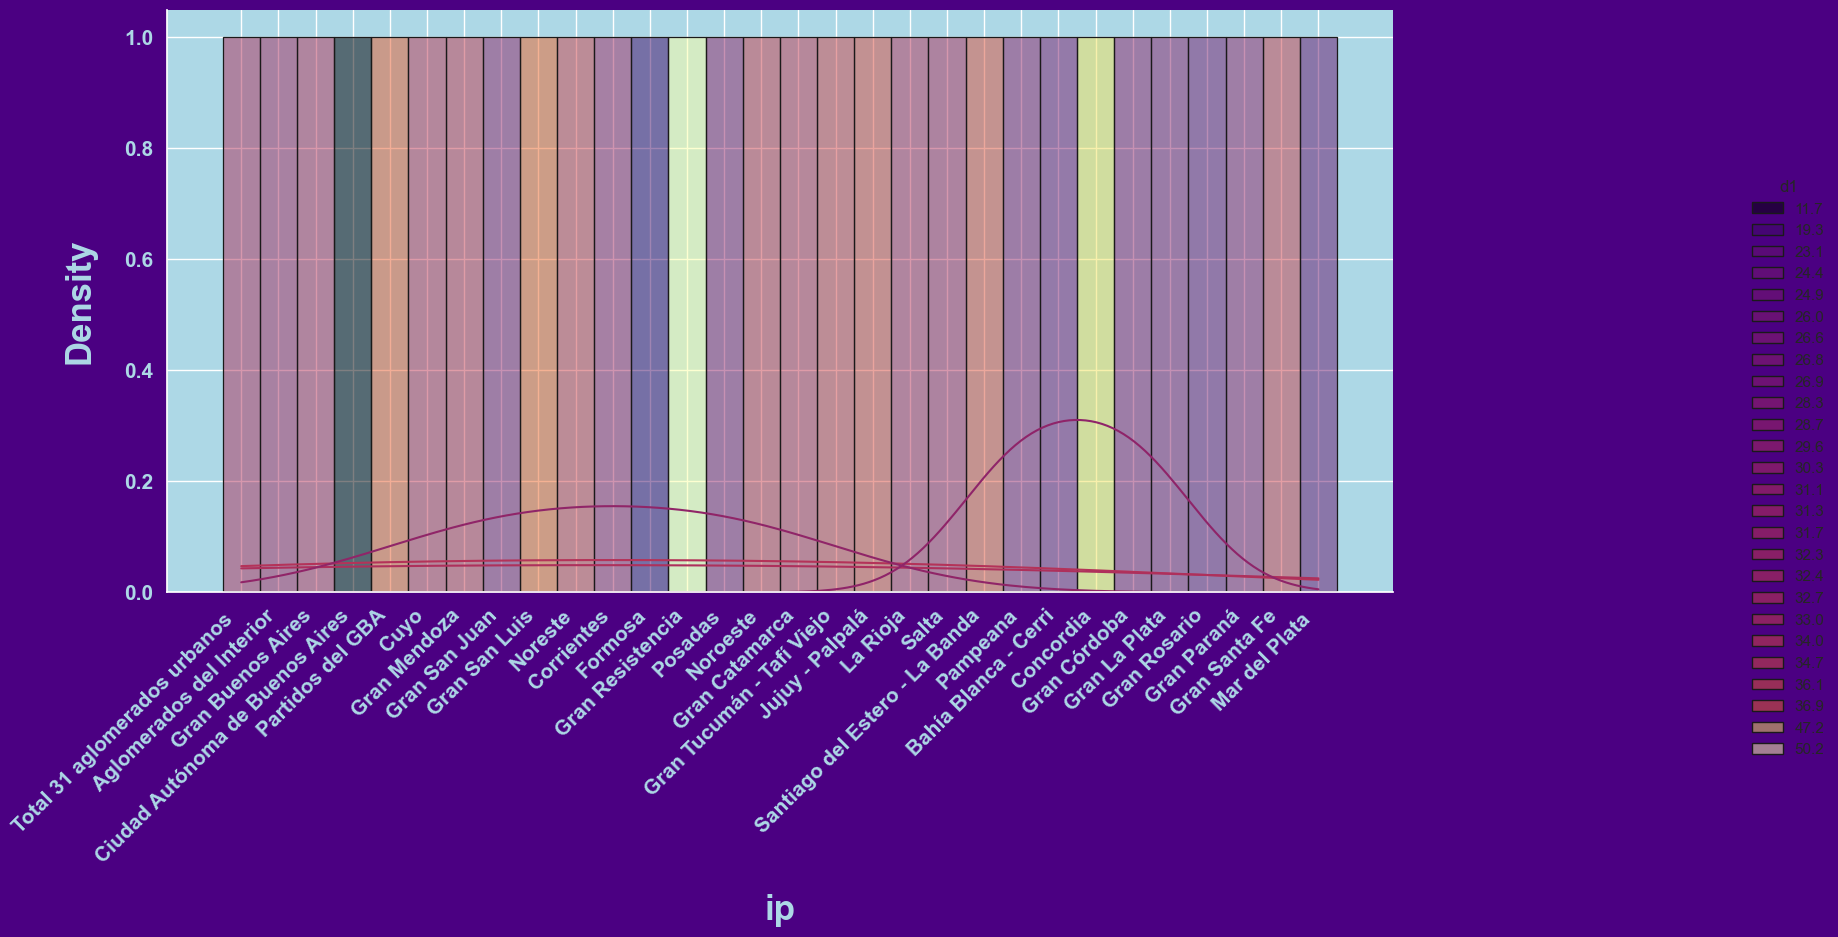

In [15]:
def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.displot(data=datos_limpios.head(30), x='ip', hue='d1',kde=True,color='b',  edgecolor='k', palette='inferno');
    ax.figure.set_size_inches(20,7)
    ax.set_titles('datos_limpios', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabels('ip', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabels('Density',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45, ha='right')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas)
    plt.show()
grafico()

In [16]:
datos_limpios.sample()

,ip,d1,d2,d3,d4
8,Gran San Luis,36.9,5.9,33.3,40.5


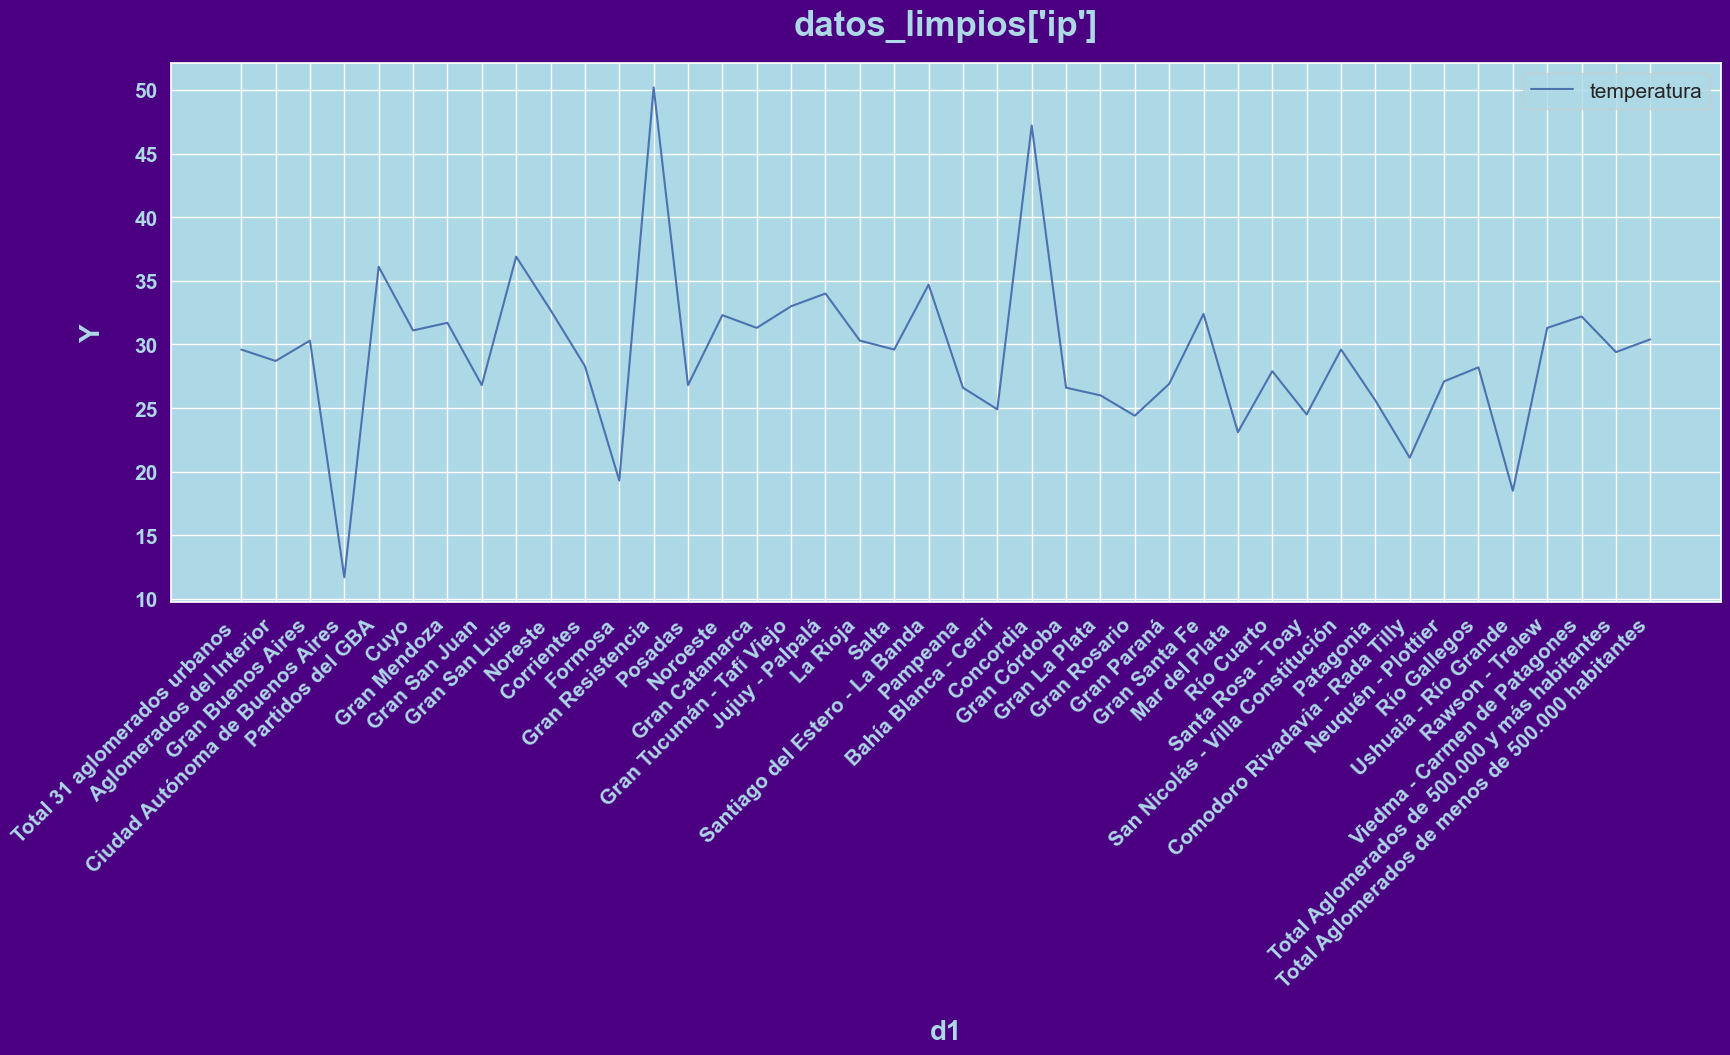

In [17]:
def grafico():
    plt.figure(figsize=(20,7), facecolor='indigo')
    plt.plot(datos_limpios['ip'], datos_limpios['d1'], color='b')
    plt.title("datos_limpios['ip']", size= 25, color='lightblue', fontweight='bold', pad=20)
    plt.xlabel('d1', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.ylabel('Y', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    # plt.xticks(rotation=45, ha='right', color='lightblue', size=15, fontweight='bold')
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45, ha='right')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.legend(['temperatura'], loc='best', fontsize=15)
    plt.show()
grafico()

In [20]:
datos_limpios.describe()

,ip,d1,d2,d3,d4
count,42,42.0,42.0,42.0,42.0
unique,42,36.0,35.0,38.0,37.0
top,Total 31 aglomerados urbanos,29.6,9.1,25.1,32.4
freq,1,3.0,4.0,2.0,2.0
